In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
DATA_DIR = '../../data'
SEED = 42

In [4]:
data = pd.read_pickle(os.path.join(DATA_DIR, 'data_1970-2017_train.pkl'))

In [5]:
exclude_cols = ['peaceyears']

In [6]:
cols = data.columns.values
target_cols = ['conf_incid', 'conf_onset']
feature_cols = [c for c in cols if c not in target_cols + exclude_cols]
print(target_cols, feature_cols)

['conf_incid', 'conf_onset'] ['year', 'Lon', 'Lat', 'crop', 'temp_sd', 'prec_sd', 'temp_mean', 'prec_mean', 'temp_dev', 'prec_dev', 'temperature', 'precipitation', 'gdp', 'pop', 'lagconf_incid', 'lagconf_onset', 'spatial_lag_incid', 'lagpop', 'laggdp', 'lagcrop', 'pop_country', 'gdp_country', 'pop_rural', 'educated_people', 'food_supply', 'trade_food', 'food_importer', 'undernour_people', 'agric_value_prod', 'imports_value', 'exports_value', 'pop_share', 'gdp_share', 'egippop', 'legippop', 'exclpop', 'lexclpop', 'country', 'continent']


In [7]:
# exclude years before 1989 (there is a huge difference between 1946-1988 and 1989-2017)
data = data[data.year >= 1989]

In [8]:
peace_rows = data[data.conf_incid == 0]
peace_rows.head()

year     Lon    Lat  crop   temp_sd   prec_sd  temp_mean  prec_mean  \
43  1989.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
44  1990.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
45  1991.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
46  1992.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
47  1993.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   

    temp_dev  prec_dev  ...  imports_value  exports_value     pop_share  \
43 -1.277844 -1.181970  ...            0.0            0.0  2.097132e-06   
44 -0.180947 -1.237706  ...            0.0            0.0  1.609189e-06   
45 -1.214847 -1.005948  ...            0.0            0.0  9.264494e-07   
46 -0.172837  0.724999  ...            0.0            0.0  9.203965e-07   
47 -1.089596  0.878360  ...            0.0            0.0  1.314645e-06   

       gdp_share  egippop  legippop  exclpop  lexclpop  country  continent  
43  6.672189e-07    0.710  0.753556   0.2322  0.246445      140          2  
44  5.167559e-07    0.710  0.753556   0.2322  0.246445      140          2  
45  2.924391e-07    0.710  0.753556   0.2322  0.246445      140          2  
46  2.893775e-07    0.798  0.817204   0.1785  0.182796      140          2  
47  4.235958e-07    0.798  0.817204   0.1785  0.182796      140          2  

[5 rows x 42 columns]

In [9]:
# subsample positives since there are too many of them
num_peace_samples = int(np.round(peace_rows.shape[0]/2.0))
discard_indices = np.random.choice(peace_rows.index, num_peace_samples, replace=False)
subsampled_data = data.drop(discard_indices)
subsampled_data.shape

(721776, 42)

In [10]:
subsampled_data[subsampled_data.conf_incid == 0].shape[0]

696747

In [11]:
subsampled_data[subsampled_data.conf_incid == 1].shape[0]

25029

In [12]:
data[data.conf_incid == 1].shape[0]

25029

In [13]:
latlon_index = pd.MultiIndex.from_arrays([subsampled_data[col] for col in ['Lat', 'Lon']])
print(len(latlon_index), subsampled_data.shape[0])
latlon_index.values

721776 721776


array([(65.25, -179.75), (65.25, -179.75), (65.25, -179.75), ...,
       (68.75, 179.75), (68.75, 179.75), (68.75, 179.75)], dtype=object)

In [14]:
unique_coords = np.unique(latlon_index.values)
len(unique_coords)

51221

In [15]:
split_percent = 0.8
train_cells = np.random.choice(unique_coords, int(np.round(len(unique_coords) * split_percent)), replace=False)
print(train_cells.size)
train_cells

40977


array([(21.75, 52.75), (28.25, -100.25), (17.25, 97.25), ...,
       (-18.25, 15.25), (48.75, 126.75), (48.25, 54.25)], dtype=object)

In [16]:
latlon_df = subsampled_data.set_index(['Lat', 'Lon'])
latlon_df.head()

year  crop   temp_sd   prec_sd  temp_mean  prec_mean  \
Lat   Lon                                                               
65.25 -179.75  1989.0   0.0  2.220147  0.001725  -6.364054   0.007669   
      -179.75  1992.0   0.0  2.220147  0.001725  -6.364054   0.007669   
      -179.75  1994.0   0.0  2.220147  0.001725  -6.364054   0.007669   
      -179.75  1997.0   0.0  2.220147  0.001725  -6.364054   0.007669   
      -179.75  1998.0   0.0  2.220147  0.001725  -6.364054   0.007669   

               temp_dev  prec_dev  temperature  precipitation  ...  \
Lat   Lon                                                      ...   
65.25 -179.75 -1.277844 -1.181970    -9.201056      -5.179671  ...   
      -179.75 -0.172837  0.724999    -6.747778      -4.719423  ...   
      -179.75 -1.059424 -1.805413    -8.716132      -5.391726  ...   
      -179.75 -1.160648 -0.336211    -8.940863      -4.949181  ...   
      -179.75 -0.225580 -0.036500    -6.864874      -4.878770  ...   

               imports_value  exports_value     pop_share     gdp_share  \
Lat   Lon                                                                 
65.25 -179.75   0.000000e+00   0.000000e+00  2.097132e-06  6.672189e-07   
      -179.75   0.000000e+00   0.000000e+00  9.203965e-07  2.893775e-07   
      -179.75   0.000000e+00   0.000000e+00  4.207554e-06  1.266784e-06   
      -179.75   1.370229e-07   1.825395e-08  1.527738e-06  4.971195e-07   
      -179.75   8.091849e-08   1.210308e-08  1.023658e-06  3.353585e-07   

               egippop  legippop  exclpop  lexclpop  country  continent  
Lat   Lon                                                                
65.25 -179.75    0.710  0.753556   0.2322  0.246445      140          2  
      -179.75    0.798  0.817204   0.1785  0.182796      140          2  
      -179.75    0.798  0.817204   0.1785  0.182796      140          2  
      -179.75    0.798  0.817204   0.1785  0.182796      140          2  
      -179.75    0.798  0.817204   0.1785  0.182796      140          2  

[5 rows x 40 columns]

In [17]:
train_data = subsampled_data[latlon_df.index.isin(train_cells)]
print(train_data.shape)
train_data.head()

(577389, 42)


year     Lon    Lat  crop   temp_sd   prec_sd  temp_mean  prec_mean  \
43  1989.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
46  1992.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
48  1994.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
51  1997.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   
52  1998.0 -179.75  65.25   0.0  2.220147  0.001725  -6.364054   0.007669   

    temp_dev  prec_dev  ...  imports_value  exports_value     pop_share  \
43 -1.277844 -1.181970  ...   0.000000e+00   0.000000e+00  2.097132e-06   
46 -0.172837  0.724999  ...   0.000000e+00   0.000000e+00  9.203965e-07   
48 -1.059424 -1.805413  ...   0.000000e+00   0.000000e+00  4.207554e-06   
51 -1.160648 -0.336211  ...   1.370229e-07   1.825395e-08  1.527738e-06   
52 -0.225580 -0.036500  ...   8.091849e-08   1.210308e-08  1.023658e-06   

       gdp_share  egippop  legippop  exclpop  lexclpop  country  continent  
43  6.672189e-07    0.710  0.753556   0.2322  0.246445      140          2  
46  2.893775e-07    0.798  0.817204   0.1785  0.182796      140          2  
48  1.266784e-06    0.798  0.817204   0.1785  0.182796      140          2  
51  4.971195e-07    0.798  0.817204   0.1785  0.182796      140          2  
52  3.353585e-07    0.798  0.817204   0.1785  0.182796      140          2  

[5 rows x 42 columns]

In [18]:
test_idx = pd.MultiIndex.from_arrays([train_data[col] for col in ['Lat', 'Lon']])
len(np.unique(test_idx.values))

40977

In [19]:
test_data = subsampled_data[~latlon_df.index.isin(train_cells)]
print(test_data.shape)
test_data.head()

(144387, 42)


year     Lon    Lat  crop   temp_sd   prec_sd  temp_mean  prec_mean  \
235  1989.0 -179.75  67.75   0.0  2.126346  0.001387 -10.685376   0.006505   
236  1990.0 -179.75  67.75   0.0  2.126346  0.001387 -10.685376   0.006505   
238  1992.0 -179.75  67.75   0.0  2.126346  0.001387 -10.685376   0.006505   
245  1999.0 -179.75  67.75   0.0  2.126346  0.001387 -10.685376   0.006505   
247  2001.0 -179.75  67.75   0.0  2.126346  0.001387 -10.685376   0.006505   

     temp_dev  prec_dev  ...  imports_value  exports_value     pop_share  \
235 -1.215177 -0.880763  ...   0.000000e+00   0.000000e+00  9.679451e-07   
236 -0.310850 -1.057762  ...   0.000000e+00   0.000000e+00  3.070619e-08   
238 -0.286537  1.142372  ...   0.000000e+00   0.000000e+00  2.581057e-08   
245 -0.250556 -1.197115  ...   1.861267e-09   3.189322e-10  2.221400e-08   
247 -0.100160 -0.020808  ...   1.449685e-08   2.390029e-09  1.806628e-07   

        gdp_share  egippop  legippop  exclpop  lexclpop  country  continent  
235  3.140020e-07    0.710  0.753556   0.2322  0.246445      140          2  
236  1.207308e-08    0.710  0.753556   0.2322  0.246445      140          2  
238  9.803098e-09    0.798  0.817204   0.1785  0.182796      140          2  
245  8.994006e-09    0.798  0.817204   0.1785  0.182796      140          2  
247  7.209453e-08    0.798  0.817204   0.1785  0.182796      140          2  

[5 rows x 42 columns]

In [20]:
test_idx = pd.MultiIndex.from_arrays([test_data[col] for col in ['Lat', 'Lon']])
len(np.unique(test_idx.values))

10244

In [21]:
Xtrain = train_data.loc[:,feature_cols]
Xtest = test_data.loc[:,feature_cols]
print(Xtrain.shape, Xtest.shape)

(577389, 39) (144387, 39)


In [22]:
Ytrain = train_data.loc[:, 'conf_incid']
Ytest = test_data.loc[:,'conf_incid']
print(Ytrain.shape, Ytest.shape)

(577389,) (144387,)


In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(Xtrain.values)
X_test = scaler.transform(Xtest.values)

In [24]:
# oversample the minority class (conflict = 1) for higher chances of learning something
from imblearn.over_sampling import SMOTE

In [31]:
sampler = SMOTE(sampling_strategy={0: 560000, 1: 50000}, random_state=SEED)

In [32]:
def print_counts(y):
    vals, counts = np.unique(y, return_counts=True)
    incid_dist = {v: c for v, c in zip(vals, counts)}
    print('0: {} ({:.2f}%) - 1: {} ({:.2f}%)'.format(incid_dist[0], incid_dist[0]/counts.sum() * 100, incid_dist[1], incid_dist[1]/counts.sum() * 100))

In [33]:
print_counts(Ytrain)

0: 557355 (96.53%) - 1: 20034 (3.47%)


In [34]:
X_train, y_train = sampler.fit_resample(X_train, Ytrain)
y_test = Ytest
print_counts(y_train)

E:\Programmi\Anaconda\envs\mlenv\lib\site-packages\imblearn\utils\_validation.py:253: UserWarning: After over-sampling, the number of samples (560000) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 557355)
  n_samples_majority))


0: 560000 (91.80%) - 1: 50000 (8.20%)


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(610000, 39) (144387, 39) (610000,) (144387,)


In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.utils.estimator_checks import check_estimator

In [85]:
class WeakSVC(SVC):
    
    def __init__(self, C=1.0, kernel='linear', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, 
                 tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None, count=1000):
        self.count = count
        super().__init__(C=C, kernel=kernel, degree=degree, gamma=gamma, coef0=coef0, 
                         shrinking=shrinking, probability=probability, tol=tol, cache_size=cache_size, 
                         class_weight=class_weight, verbose=verbose, max_iter=max_iter, decision_function_shape=decision_function_shape, random_state=random_state)
    
    
    def fit(self, X, y, sample_weight=None):
        self.classes_ = np.unique(y)
        indices = []
        for c in self.classes_:
            subset = np.argwhere(y == c).flatten()
            subset = np.random.choice(subset, min(self.count, len(subset)-1))
            indices = np.concatenate((indices, subset), axis=None).astype(int)
        X_subsampled = X[indices]
        y_subsampled = y[indices]
        return super().fit(X_subsampled, y_subsampled, sample_weight[indices])
    
    
    def predict(self, X):
        print(x.shape)
        super().predict(X)
        

In [86]:
weights = {0: 1, 1: 10}

In [87]:
classifiers = []
classifiers.append(AdaBoostClassifier(base_estimator=WeakSVC(probability=True, count=1000), learning_rate=0.1, random_state=SEED))
classifiers.append(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, class_weight=weights), n_estimators=80, learning_rate=0.1, random_state=SEED))
classifiers.append(RandomForestClassifier(n_estimators = 40, random_state=SEED, max_depth=8, class_weight=weights))
classifiers.append(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED))


In [88]:
def class_weights(labels, smooth=1, multiplier=1):
    vals, counts = np.unique(labels, return_counts=True)
    total = np.sum(counts)
    probs = 1 - (counts / total)
    uniform = np.ones(probs.shape) * 1 / len(vals)
    diff = probs - uniform
    probs = probs - diff * smooth
    probs /= np.min(probs)
    probs *= multiplier
    return {v: w for v, w in zip(vals, probs)}

In [89]:
for clf in classifiers:
    print('Fitting {} ...'.format(type(clf).__name__))
    clf.fit(X_train, y_train)

Fitting AdaBoostClassifier ...
Fitting AdaBoostClassifier ...
Fitting RandomForestClassifier ...
Fitting GradientBoostingClassifier ...


In [90]:
if False:
    plt.figure(figsize=(20,10))
    plt.bar(range(len(feature_cols)), clf.feature_importances_)
    plt.xticks(range(len(feature_cols)), feature_cols, rotation=90)
    plt.show()

In [91]:
preds = []
for clf in classifiers:
    preds.append(clf.predict(X_test))

In [92]:
from sklearn.metrics import cohen_kappa_score, f1_score, balanced_accuracy_score, precision_score

scores = [precision_score, cohen_kappa_score, f1_score, balanced_accuracy_score]

results = np.zeros((len(classifiers), len(scores)))
for x, p in enumerate(preds):  
    for y, score in enumerate(scores):
        results[x,y] = score(y_test.values, p)

In [93]:
for index, model in enumerate(classifiers):
    result = {s.__name__: '{:.4f}'.format(r) for s, r in zip(scores, results[index])}
    print('{:<30s}: {}'.format(type(model).__name__, result))

AdaBoostClassifier            : {'precision_score': '0.2238', 'cohen_kappa_score': '0.2753', 'f1_score': '0.3614', 'balanced_accuracy_score': '0.8396'}
AdaBoostClassifier            : {'precision_score': '0.2906', 'cohen_kappa_score': '0.3734', 'f1_score': '0.4439', 'balanced_accuracy_score': '0.8786'}
RandomForestClassifier        : {'precision_score': '0.3764', 'cohen_kappa_score': '0.4864', 'f1_score': '0.5407', 'balanced_accuracy_score': '0.9166'}
GradientBoostingClassifier    : {'precision_score': '0.8399', 'cohen_kappa_score': '0.7045', 'f1_score': '0.7232', 'balanced_accuracy_score': '0.8127'}


In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

In [95]:
def plot_roc(tpr, fpr):
    plt.plot(tpr, fpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [96]:
probs = []
for clf in classifiers:
    print("predicting probs for {}...".format(type(clf).__name__))
    p = clf.predict_proba(X_test)
    probs.append(p[:,1])

predicting probs for AdaBoostClassifier...
predicting probs for AdaBoostClassifier...
predicting probs for RandomForestClassifier...
predicting probs for GradientBoostingClassifier...


In [97]:
for p in probs:
    print(p.shape, y_test.values.shape)
    auc = roc_auc_score(y_test.values, p)
    print('AUC: %.2f' % auc)

(245475,) (245475,)
AUC: 0.90
(245475,) (245475,)
AUC: 0.93
(245475,) (245475,)
AUC: 0.98
(245475,) (245475,)
AUC: 0.97


In [98]:
rocs = []

for p in probs:   
    rocs.append(roc_curve(y_test.values, p))

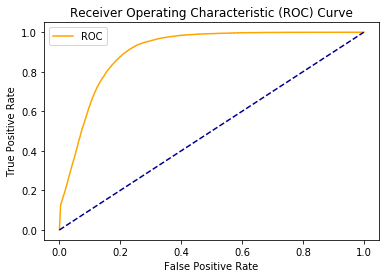

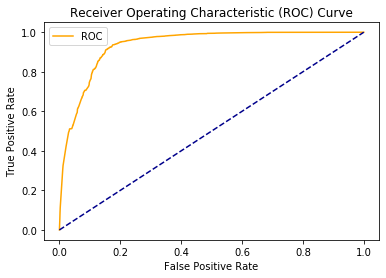

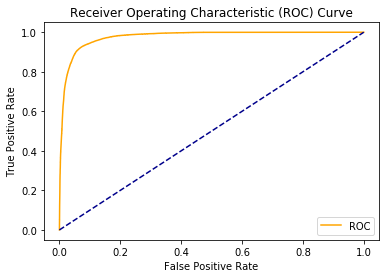

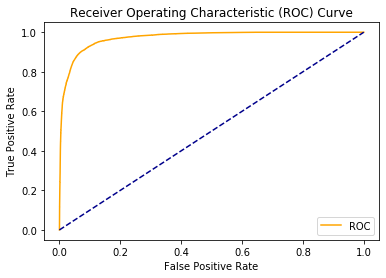

In [99]:
for roc in rocs:
    plot_roc(roc[0], roc[1])
#plot_roc(fpr, tpr)

In [100]:
from sklearn.metrics import confusion_matrix

for p in preds:
    print('{:<10s} | {:<10s} | {:<10s}'.format(' ', 'peace', 'conf'))
    cm = confusion_matrix(y_test.values, p)
    print('{:<10s} | {:<10s} | {:<10s}'.format('peace', str(cm[0,0]), str(cm[0,1])))
    print('{:<10s} | {:<10s} | {:<10s}'.format('conf',  str(cm[1,0]), str(cm[1,1])))
    print('')

           | peace      | conf      
peace      | 168683     | 58726     
conf       | 1131       | 16935     

           | peace      | conf      
peace      | 185979     | 41430     
conf       | 1096       | 16970     

           | peace      | conf      
peace      | 198694     | 28715     
conf       | 731        | 17335     

           | peace      | conf      
peace      | 225223     | 2186      
conf       | 6594       | 11472     



In [101]:
from sklearn.metrics import cohen_kappa_score, f1_score, balanced_accuracy_score, precision_score

scores = [precision_score, cohen_kappa_score, f1_score, balanced_accuracy_score]

results = np.zeros((len(classifiers), len(scores)))
for x, p in enumerate(preds):  
    for y, score in enumerate(scores):
        results[x,y] = score(y_test.values, p)

In [102]:
for index, model in enumerate(classifiers):
    result = {s.__name__: '{:.4f}'.format(r) for s, r in zip(scores, results[index])}
    print('{:<30s}: {}'.format(type(model).__name__, result))

AdaBoostClassifier            : {'precision_score': '0.2238', 'cohen_kappa_score': '0.2753', 'f1_score': '0.3614', 'balanced_accuracy_score': '0.8396'}
AdaBoostClassifier            : {'precision_score': '0.2906', 'cohen_kappa_score': '0.3734', 'f1_score': '0.4439', 'balanced_accuracy_score': '0.8786'}
RandomForestClassifier        : {'precision_score': '0.3764', 'cohen_kappa_score': '0.4864', 'f1_score': '0.5407', 'balanced_accuracy_score': '0.9166'}
GradientBoostingClassifier    : {'precision_score': '0.8399', 'cohen_kappa_score': '0.7045', 'f1_score': '0.7232', 'balanced_accuracy_score': '0.8127'}


### PCA

In [103]:
from sklearn.decomposition import PCA

N_PCA = 10
pca = PCA(n_components=N_PCA)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [104]:
classifiers = []

classifiers.append(RandomForestClassifier(random_state=SEED, max_depth=10, class_weight=weights))
classifiers.append(AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED))
#classifiers.append(AdaBoostClassifier(base_estimator=SVC(), learning_rate=0.1, random_state=SEED))
classifiers.append(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=SEED))

In [105]:
for clf in classifiers:
    print('Fitting {} ...'.format(type(clf).__name__))
    clf.fit(X_train_pca, y_train)

Fitting RandomForestClassifier ...


E:\Programmi\Anaconda\envs\mlenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Fitting AdaBoostClassifier ...
Fitting GradientBoostingClassifier ...


In [106]:
preds = []
for clf in classifiers:
    preds.append(clf.predict(X_test_pca))

In [107]:
from sklearn.metrics import cohen_kappa_score, f1_score, balanced_accuracy_score, precision_score

scores = [precision_score, cohen_kappa_score, f1_score, balanced_accuracy_score]

results = np.zeros((len(classifiers), len(scores)))
for x, p in enumerate(preds):  
    for y, score in enumerate(scores):
        results[x,y] = score(y_test.values, p)

In [108]:
for index, model in enumerate(classifiers):
    result = {s.__name__: '{:.4f}'.format(r) for s, r in zip(scores, results[index])}
    print('{:<30s}: {}'.format(type(model).__name__, result))

RandomForestClassifier        : {'precision_score': '0.3451', 'cohen_kappa_score': '0.4434', 'f1_score': '0.5031', 'balanced_accuracy_score': '0.8942'}
AdaBoostClassifier            : {'precision_score': '0.6765', 'cohen_kappa_score': '0.1314', 'f1_score': '0.1451', 'balanced_accuracy_score': '0.5391'}
GradientBoostingClassifier    : {'precision_score': '0.6974', 'cohen_kappa_score': '0.4443', 'f1_score': '0.4719', 'balanced_accuracy_score': '0.6722'}
